In [73]:
# 1. Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [74]:
# 2. Import the dataset (same directory)
df = pd.read_csv('cancer.csv')

In [75]:
# 3. Exploratory data analysis: Data Information
print(df.head())
print(df.shape)
print(df.info())

        Id  Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1

In [76]:
# 2-1. object delete 
df = df.drop(columns=['Bare_Nuclei'])
# 3. Exploratory data analysis: Class Inbalance?
print(df['Class'].value_counts())
print()
print(df['Class'].value_counts()/np.float64(len(df)))

Class
2    458
4    241
Name: count, dtype: int64

Class
2    0.655222
4    0.344778
Name: count, dtype: float64


In [77]:
# 3. Exploratory data analysis: Missing Data?
print(df.isnull().sum())

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


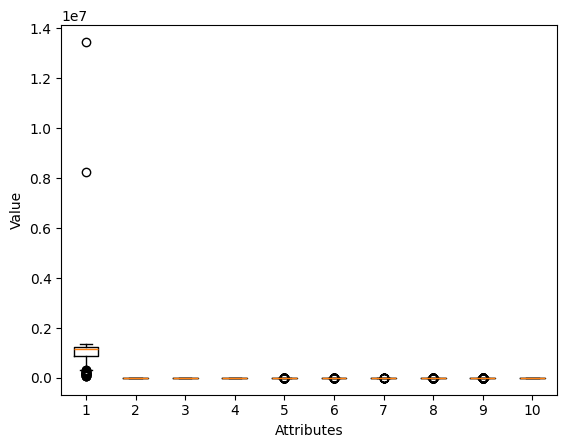

In [78]:
# 3. Exploratory data analysis: Outliers
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

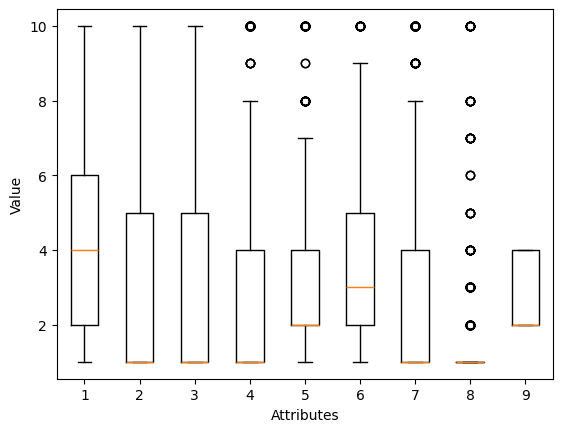

In [79]:
# 3. Exploratory data analysis: Outliers?
data_to_boxplot = df.drop(columns=['Id'])
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()
df = df.drop(columns=['Id'])

In [80]:
# 4. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
15                 7                     4                      6   
665                1                     1                      1   
348                3                     4                      4   
429                2                     1                      1   
282                1                     4                      3   
..               ...                   ...                    ...   
599                5                     2                      4   
360                6                    10                     10   
439                5                     1                      1   
174                8                     6                      5   
122               10                    10                     10   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bland_Chromatin  \
15                   4                            6                4   
665                  1     

In [81]:
# 5. Fit K Neighbours Classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]


In [82]:
# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[136   2]
 [  9  63]]
0.9476190476190476


In [83]:
# 7. Rebuild kNN Classification model using different values of k 
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
[[136   2]
 [  9  63]]
0.9476190476190476


In [84]:
# 7. Rebuild kNN Classification model using different values of k 
classifier = KNeighborsClassifier(n_neighbors = 30)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
[[136   2]
 [  9  63]]
0.9476190476190476


[0.9333333333333333, 0.9047619047619048, 0.9428571428571428, 0.9285714285714286, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428,

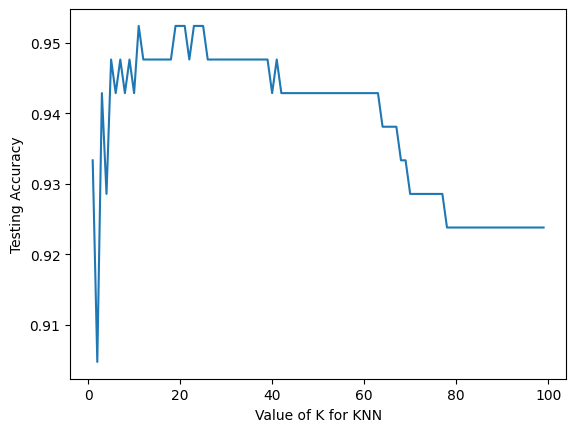

In [85]:
# 7. Improving Accuracy: Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [86]:
# 8. Improving Accuracy: Changing split ratio
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(559, 8)
(559,)
(140, 8)
(140,)


[0.9285714285714286, 0.8928571428571429, 0.9357142857142857, 0.9357142857142857, 0.95, 0.9357142857142857, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9285714285714286, 0.95, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.93571

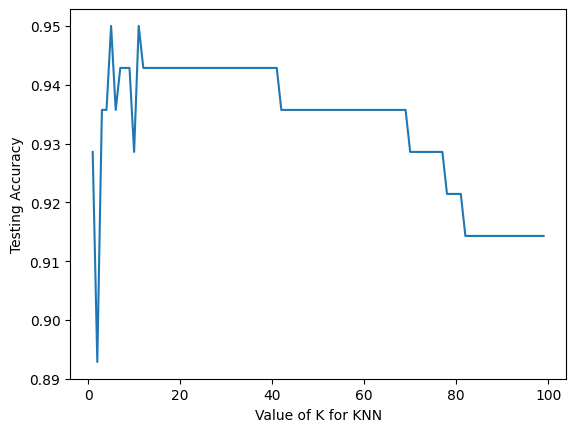

In [87]:
# 8. Improving Accuracy: Changing split ratio
# Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

<Axes: >

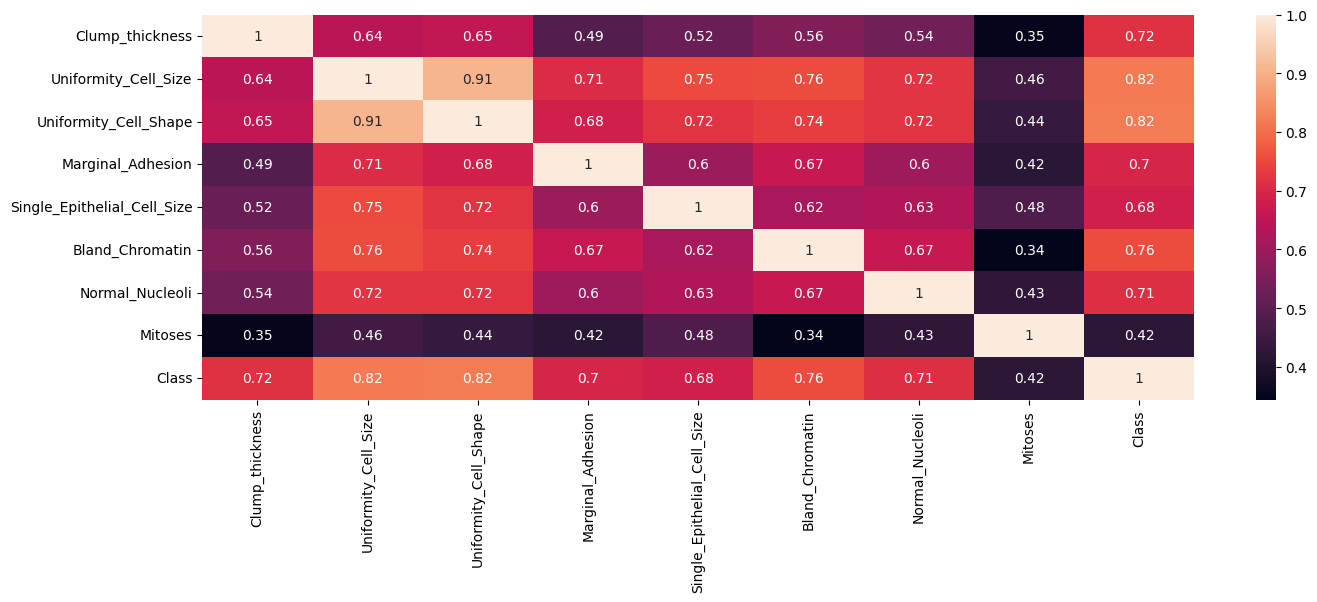

In [88]:
# 9. Improving Accuracy: Feature Engineering
dfcorr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

In [89]:
# 10. Improving Accuracy: Feature Engineering
df = df.drop(columns=['Single_Epithelial_Cell_Size','Mitoses'])

In [90]:
# 11. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(559, 6)
(559,)
(140, 6)
(140,)


[0.9357142857142857, 0.8928571428571429, 0.9428571428571428, 0.9428571428571428, 0.9571428571428572, 0.9428571428571428, 0.9571428571428572, 0.9428571428571428, 0.95, 0.9428571428571428, 0.9428571428571428, 0.9357142857142857, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.94285714285

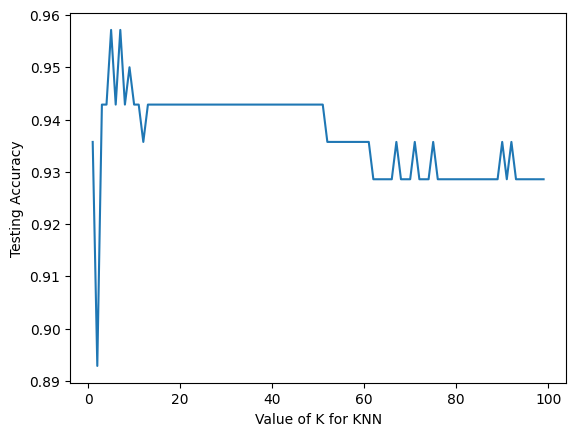

In [91]:
# 11. Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [92]:
# 12. Improving Accuracy: Feature Scaling
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Bland_Chromatin,Normal_Nucleoli,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.437768,2.866953,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.438364,3.053634,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


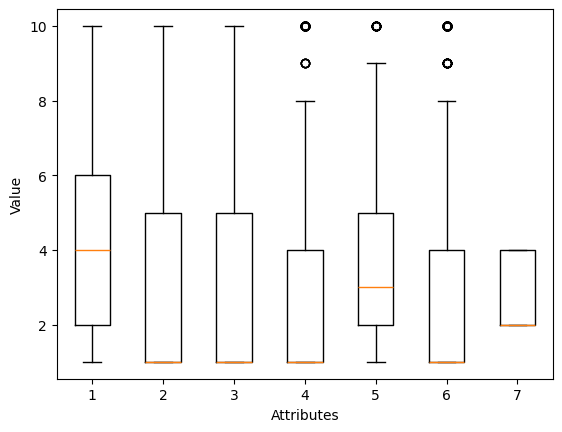

In [93]:
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [94]:
# 12. Improving Accuracy: Feature Scaling
from sklearn.preprocessing import RobustScaler

#Create copy of dataset.
df = df.copy()

scaler = RobustScaler()


features = [['Marginal_Adhesion', 'Normal_Nucleoli']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])



In [95]:
# 13. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(559, 6)
(559,)
(140, 6)
(140,)


[0.9357142857142857, 0.9, 0.9571428571428572, 0.9571428571428572, 0.9642857142857143, 0.9571428571428572, 0.9714285714285714, 0.9642857142857143, 0.9714285714285714, 0.95, 0.9714285714285714, 0.95, 0.9571428571428572, 0.9571428571428572, 0.9642857142857143, 0.9428571428571428, 0.9571428571428572, 0.9428571428571428, 0.95, 0.9428571428571428, 0.95, 0.9428571428571428, 0.95, 0.9428571428571428, 0.9571428571428572, 0.9428571428571428, 0.95, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857

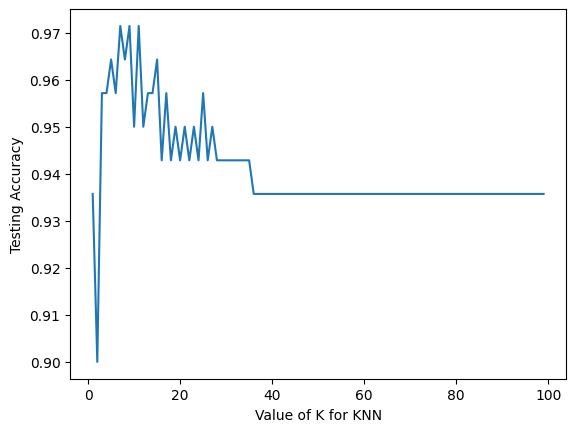

In [96]:
# 14. Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()